# Bootcamp: Ciência de dados
# Aluno(a): Wallingson
# Relatório de Entrega do Desafio Final

# Lendo a base de dados

In [1]:
import pandas as pd

# Leitura dos arquivos
df_consumo = pd.read_csv('/content/drive/MyDrive/consumo_energia_eletrica.csv')

# Aqui adicionamos o separador e a codificação correta
df_estados = pd.read_csv('/content/drive/MyDrive/estado_regiao.csv', sep=';', encoding='latin1')

# Visualização inicial
print("Consumo - primeiras linhas:")
display(df_consumo.head())

print("\nEstados - primeiras linhas:")
display(df_estados.head())

Consumo - primeiras linhas:


,ano,mes,sigla_uf,tipo_consumo,numero_consumidores,consumo
0,2004,1,TO,Total,NaN,65876
1,2004,1,BA,Total,NaN,1444451
2,2004,1,PR,Total,NaN,1596274
3,2004,1,RS,Total,NaN,1780912
4,2004,1,GO,Total,NaN,630624



Estados - primeiras linhas:


,id_estado,sigla,estado,regiao,pais
0,1,AC,Acre,Norte,Brasil
1,2,AL,Alagoas,Nordeste,Brasil
2,3,AP,Amapá,Norte,Brasil
3,4,AM,Amazonas,Norte,Brasil
4,5,BA,Bahia,Nordeste,Brasil


# Eliminando linhas com dados faltantes para evitar distorções

In [4]:
# Remove espaços nos nomes das colunas
df_consumo.columns = df_consumo.columns.str.strip()
df_estados.columns = df_estados.columns.str.strip()

# Renomeia a coluna 'sigla' para 'sigla_uf' para fazer o join
df_estados = df_estados.rename(columns={'sigla': 'sigla_uf'})

# Remove todas as linhas com qualquer NaN
df_consumo = df_consumo.dropna()
df_estados = df_estados.dropna()

# Padroniza o texto da coluna de junção
df_consumo['sigla_uf'] = df_consumo['sigla_uf'].str.strip().str.upper()
df_estados['sigla_uf'] = df_estados['sigla_uf'].str.strip().str.upper()

# Faz o inner join
df_merged = pd.merge(df_consumo, df_estados, on='sigla_uf', how='inner')

# Remove qualquer NaN remanescente após o join (opcional)
df_merged = df_merged.dropna()

print("\nResultado do inner join:")
display(df_merged.head())


Resultado do inner join:


,ano,mes,sigla_uf,tipo_consumo,numero_consumidores,consumo,id_estado,estado,regiao,pais
0,2004,1,RN,Outros,40857.0,69617,20,Rio Grande do Norte,Nordeste,Brasil
1,2004,1,SP,Outros,311650.0,937538,25,São Paulo,Sudeste,Brasil
2,2004,1,MS,Outros,56881.0,67601,12,Mato Grosso do Sul,Centro-Oeste,Brasil
3,2004,1,SC,Outros,226165.0,209380,24,Santa Catarina,Sul,Brasil
4,2004,1,RJ,Outros,70634.0,416128,19,Rio de Janeiro,Sudeste,Brasil


# Quais regiões mais consomem energia?

- **Região Sudeste** lidera o consumo total com mais de **4,7 bilhões de kWh**, refletindo a maior demanda energética devido à sua alta densidade populacional, forte desenvolvimento industrial e concentração econômica.

- A **Região Sul** ocupa o segundo lugar, com aproximadamente **1,6 bilhão de kWh**, seguida de perto pelo **Nordeste**, com cerca de **1,57 bilhão de kWh**.

- As regiões **Centro-Oeste** e **Norte** apresentam os menores consumos totais, com valores próximos de **661 milhões** e **633 milhões de kWh**, respectivamente. Isso reflete uma menor concentração populacional e atividade econômica nessas áreas.

---

Este panorama evidencia a distribuição econômica e demográfica do país, onde regiões mais industrializadas e urbanizadas tendem a consumir mais energia elétrica. Esses dados são fundamentais para:

- **Planejamento energético**
- **Formulação de políticas públicas**
- **Investimentos em infraestrutura**

Além disso, permitem identificar demandas específicas e apoiar o desenvolvimento sustentável equilibrado em todas as regiões do país.


📋 Consumo Total por Região (Consolidado):
         Região  Consumo Total
3       Sudeste     4744608132
4           Sul     1637902383
1      Nordeste     1575055424
0  Centro-Oeste      661226350
2         Norte      633231262


/tmp/ipython-input-29-4264773040.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


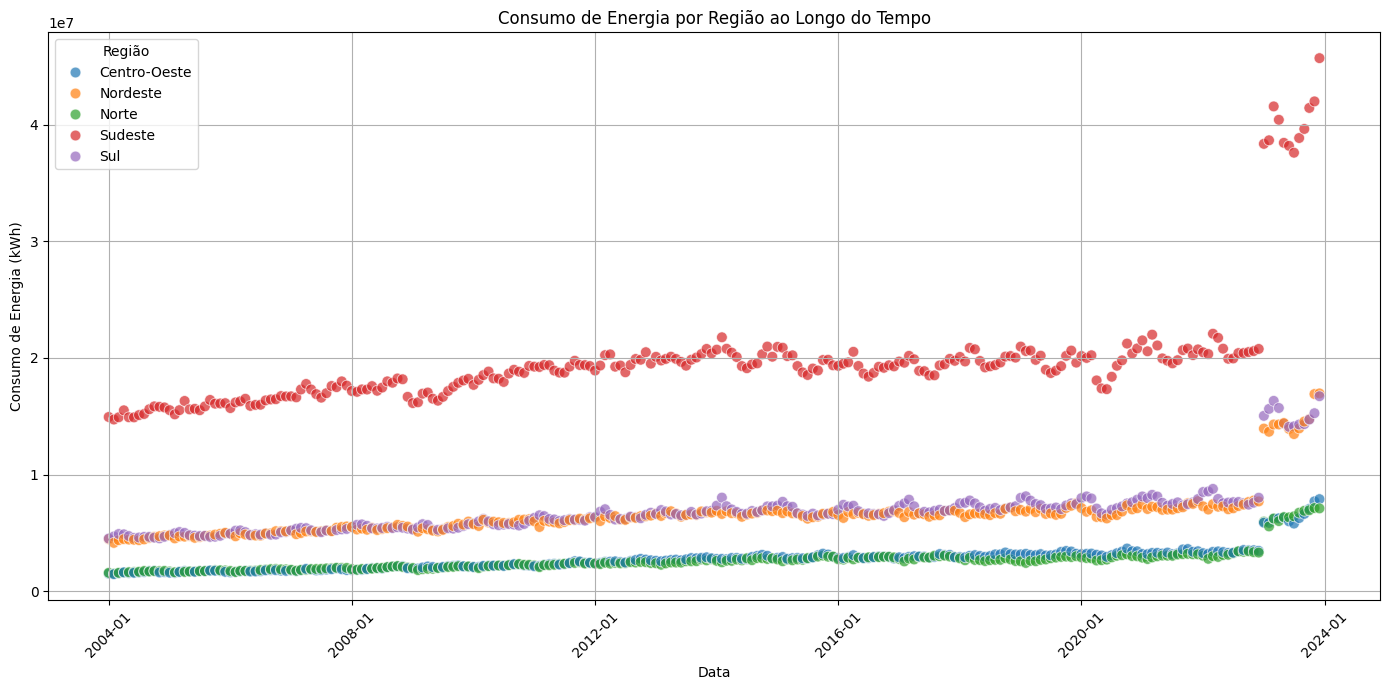

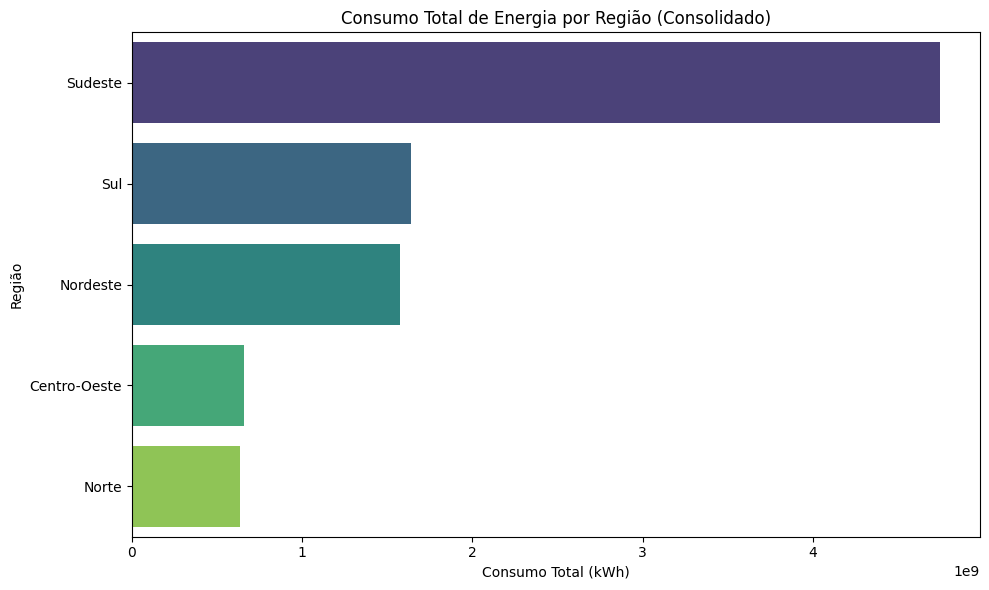

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.dates as mdates

# =========================
# 📦 Pré-processamento
# =========================

# Corrige tipos das colunas de ano e mês
df_merged['ano'] = df_merged['ano'].astype(int)
df_merged['mes'] = df_merged['mes'].astype(int)

# Cria coluna de data com o primeiro dia do mês
df_merged['data'] = pd.to_datetime(
    df_merged[['ano', 'mes']].rename(columns={'ano': 'year', 'mes': 'month'}).assign(day=1)
)

# Filtra dados válidos de consumo e região
df_plot = df_merged[
    df_merged['consumo'].notna() & df_merged['regiao'].notna()
]

# =========================
# 📊 Gráfico de Dispersão
# =========================

# Agrupa por data e região (soma do consumo)
df_grouped = df_plot.groupby(['data', 'regiao'])['consumo'].sum().reset_index()
df_grouped = df_grouped.sort_values('data')

# Cria o gráfico
plt.figure(figsize=(14, 7))
sns.scatterplot(
    data=df_grouped,
    x='data',
    y='consumo',
    hue='regiao',
    alpha=0.7,
    s=60
)

# Formata o eixo X para mostrar mês/ano
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

# Ajustes visuais
plt.title('Consumo de Energia por Região ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Consumo de Energia (kWh)')
plt.grid(True)
plt.tight_layout()
plt.legend(title='Região', loc='best')

# =========================
# 📋 Tabela Consolidada
# =========================

# Total de consumo por região (sem considerar data)
consumo_total_por_regiao = (
    df_plot.groupby('regiao')['consumo']
    .sum()
    .reset_index()
    .rename(columns={'regiao': 'Região', 'consumo': 'Consumo Total'})
    .sort_values('Consumo Total', ascending=False)
)

# Exibe a tabela
print("\n📋 Consumo Total por Região (Consolidado):")
print(consumo_total_por_regiao)

# =========================
# 📊 (Opcional) Gráfico de Barras da Tabela
# =========================

plt.figure(figsize=(10, 6))
sns.barplot(
    data=consumo_total_por_regiao,
    x='Consumo Total',
    y='Região',
    palette='viridis'
)

plt.title('Consumo Total de Energia por Região (Consolidado)')
plt.xlabel('Consumo Total (kWh)')
plt.ylabel('Região')
plt.tight_layout()

# =========================
# 📈 Exibe todos os gráficos
# =========================

plt.show()

# Análise do Número Total de Consumidores por Região

A tabela abaixo apresenta o total consolidado de consumidores em cada região do país:

| Região        | Total de Consumidores     |
|---------------|---------------------------|
| **Sudeste**   | 8.442.994.683             |
| **Nordeste**  | 4.879.431.614             |
| **Sul**       | 2.829.768.093             |
| **Centro-Oeste** | 1.441.077.404           |
| **Norte**     | (dados ausentes/incompletos) |

---

### Considerações:

- A **Região Sudeste** possui o maior número de consumidores, o que está alinhado com sua posição econômica e populacional no país.
- O **Nordeste** ocupa a segunda posição, indicando uma grande base de consumidores.
- As regiões **Sul** e **Centro-Oeste** apresentam quantidades intermediárias, refletindo suas populações e níveis de desenvolvimento.
- O dado para a **Região Norte** não está completo ou ausente, o que indica a necessidade de revisão ou atualização dos dados para uma análise mais precisa.

---

Estes dados são importantes para entender a distribuição da base de consumidores, possibilitando um melhor planejamento de infraestrutura, atendimento e políticas regionais específicas.


📋 Número Total de Consumidores por Região:


,Região,Total de Consumidores
3,Sudeste,8.442995e+09
1,Nordeste,4.879432e+09
4,Sul,2.829768e+09
0,Centro-Oeste,1.441077e+09
2,Norte,1.140246e+09


/tmp/ipython-input-30-3867404627.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


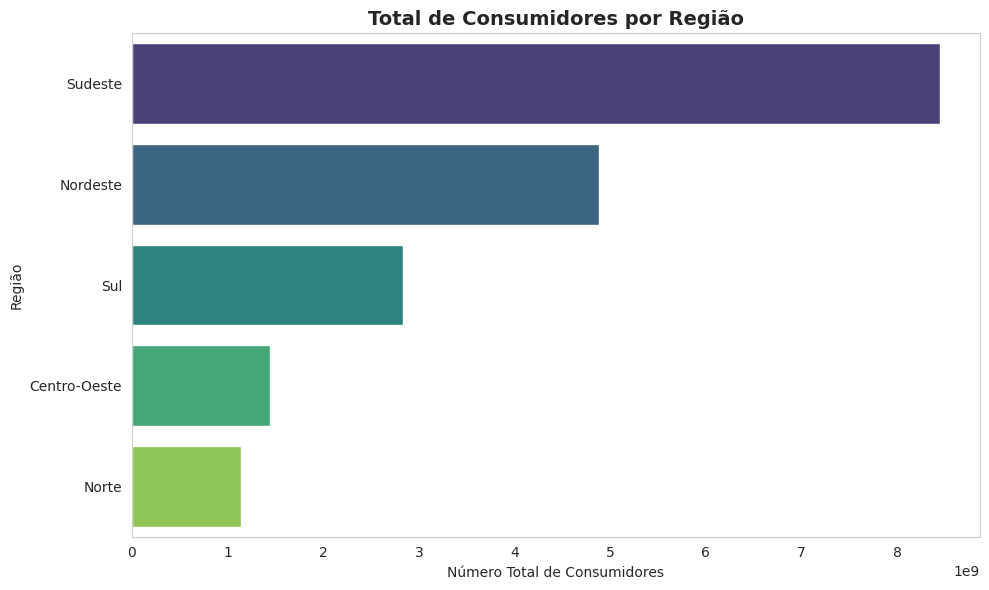

from matplotlib import pyplot as plt
consumidores_por_regiao['Total de Consumidores'].plot(kind='hist', bins=20, title='Total de Consumidores')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
consumidores_por_regiao.groupby('Região').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
consumidores_por_regiao['Total de Consumidores'].plot(kind='line', figsize=(8, 4), title='Total de Consumidores')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(consumidores_por_regiao['Região'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(consumidores_por_regiao, x='Total de Consumidores', y='Região', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# =========================
# 📊 Análise: Regiões com Mais Consumidores
# =========================

# Agrupa por região e soma o número de consumidores
consumidores_por_regiao = (
    df_merged.groupby('regiao')['numero_consumidores']
    .sum()
    .reset_index()
    .rename(columns={'regiao': 'Região', 'numero_consumidores': 'Total de Consumidores'})
    .sort_values('Total de Consumidores', ascending=False)
)

# Exibe a tabela no console
print("\n📋 Número Total de Consumidores por Região:")
display(consumidores_por_regiao)

# =========================
# 📈 Gráfico de Barras
# =========================

# Define estilo do seaborn
sns.set_style('whitegrid')

# Cria o gráfico
plt.figure(figsize=(10, 6))
sns.barplot(
    data=consumidores_por_regiao,
    y='Região',
    x='Total de Consumidores',
    palette='viridis'
)

# Título e rótulos
plt.title('Total de Consumidores por Região', fontsize=14, weight='bold')
plt.xlabel('Número Total de Consumidores')
plt.ylabel('Região')

# Layout e grid
plt.grid(axis='x')
plt.tight_layout()

# Exibe o gráfico
plt.show()

# Análise do Consumo Médio de Energia por Tipo de Consumo

A tabela apresenta o consumo médio de energia (em kWh) por diferentes tipos de consumo:

| Tipo de Consumo | Consumo Médio (kWh) |
|-----------------|---------------------|
| **Outros**      | 209.883             |
| **Comercial**   | 241.786             |
| **Residencial** | 380.019             |
| **Industrial**  | 536.710             |

---

### Observações:

- O **consumo médio industrial** é o mais alto, com aproximadamente **536.710 kWh**, refletindo a alta demanda energética das atividades industriais que geralmente envolvem processos produtivos intensivos em energia.
- O **consumo residencial** também é significativo, com cerca de **380.019 kWh**, indicando o peso dos lares na matriz de consumo energético.
- O **setor comercial** apresenta um consumo médio intermediário, próximo a **241.786 kWh**, compatível com as necessidades de lojas, escritórios e serviços.
- A categoria **Outros** possui o menor consumo médio, com cerca de **209.883 kWh**, abrangendo usos variados que não se encaixam nas categorias principais.

---

Esses dados são importantes para orientar políticas de eficiência energética e investimentos em infraestrutura, visando otimizar o uso de energia conforme as características e demandas de cada tipo de consumidor.

### Consumo Médio de Energia por Tipo de Consumo



,Tipo de Consumo,Consumo Médio (kWh)
0,Outros,209883.296858
1,Comercial,241785.825250
2,Residencial,380018.618607
3,Industrial,536710.406085


/tmp/ipython-input-43-2757530223.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


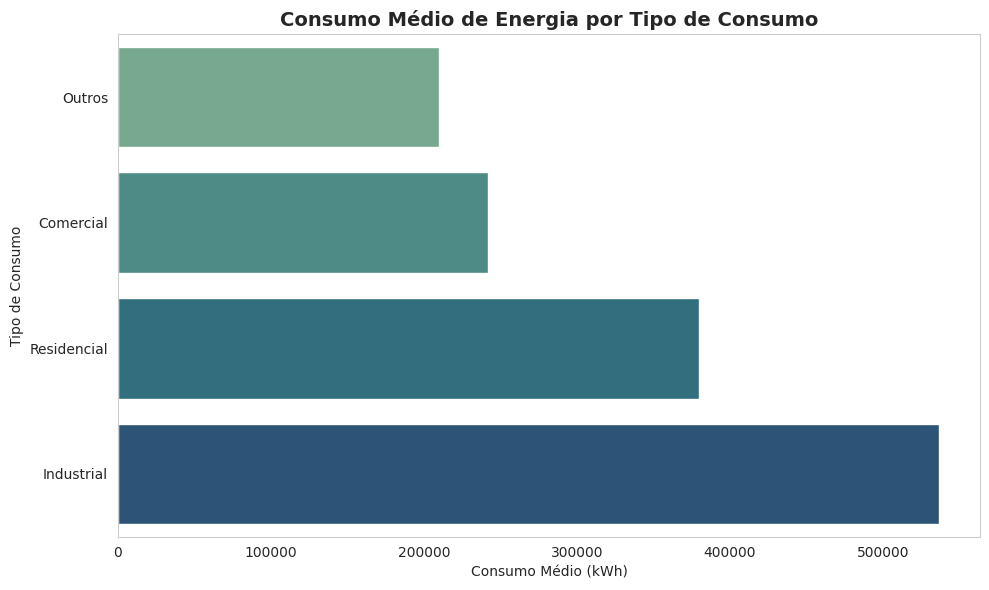

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from IPython.display import display  # Import necessário para mostrar tabelas em notebooks

# =========================
# 📦 Pré-processamento
# =========================

# Filtra dados com valores válidos de consumo e tipo de consumo
df_tipo = df_merged.dropna(subset=['consumo', 'tipo_consumo']).copy()

# Garante que a coluna consumo está em formato numérico
df_tipo['consumo'] = pd.to_numeric(df_tipo['consumo'], errors='coerce')

# Remove linhas com consumo inválido
df_tipo = df_tipo.dropna(subset=['consumo'])

# =========================
# 📊 Cálculo da Média por Tipo de Consumo
# =========================

# Agrupa e calcula o consumo médio por tipo de consumo
media_por_tipo = (
    df_tipo.groupby('tipo_consumo')['consumo']
    .mean()
    .sort_values()
    .reset_index()
    .rename(columns={'tipo_consumo': 'Tipo de Consumo', 'consumo': 'Consumo Médio (kWh)'})
)

# Exibe a tabela no notebook
print("### Consumo Médio de Energia por Tipo de Consumo\n")
display(media_por_tipo)

# =========================
# 📈 Gráfico
# =========================

# Estilo visual
sns.set_style("whitegrid")

# Figura
plt.figure(figsize=(10, 6))
sns.barplot(
    data=media_por_tipo,
    y='Tipo de Consumo',
    x='Consumo Médio (kWh)',
    palette='crest'
)

# Personalização
plt.title('Consumo Médio de Energia por Tipo de Consumo', fontsize=14, weight='bold')
plt.xlabel('Consumo Médio (kWh)')
plt.ylabel('Tipo de Consumo')
plt.tight_layout()
plt.grid(axis='x')

# Exibe o gráfico
plt.show()

# Análise do Consumo Médio Per Capita por Região

A tabela apresenta o consumo médio de energia elétrica por consumidor em cada região do país, medido em kWh:

| Região       | Consumo Médio Per Capita (kWh) |
|--------------|--------------------------------|
| **Sul**         | 4,50                           |
| **Centro-Oeste**| 6,92                           |
| **Nordeste**    | 10,89                          |
| **Sudeste**     | 11,15                          |
| **Norte**       | 13,11                          |

---

### Observações:

- A **Região Norte** apresenta o maior consumo médio per capita, com aproximadamente **13,11 kWh** por consumidor, o que pode refletir fatores como o perfil socioeconômico, uso de energia para aquecimento, refrigeração ou peculiaridades regionais no consumo residencial e industrial.
  
- O **Sudeste** e o **Nordeste** também exibem consumos per capita elevados, próximos a **11,15 kWh** e **10,89 kWh**, respectivamente, indicando uma demanda significativa por consumidor nessas regiões.

- As regiões **Centro-Oeste** e **Sul** apresentam os menores consumos médios per capita, com valores próximos a **6,92 kWh** e **4,50 kWh**, respectivamente, possivelmente relacionados a menor densidade populacional ou diferenças no padrão de consumo.

---

Essas informações são importantes para compreender as diferenças regionais no uso de energia e podem subsidiar estratégias para eficiência energética, políticas públicas direcionadas e planejamento de investimentos para atender às necessidades específicas de cada região.

### Consumo Médio Per Capita por Região



,Região,Consumo Médio Per Capita (kWh)
0,Sul,4.503566
1,Centro-Oeste,6.918054
2,Nordeste,10.893437
3,Sudeste,11.148638
4,Norte,13.111076


/tmp/ipython-input-44-4148685267.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


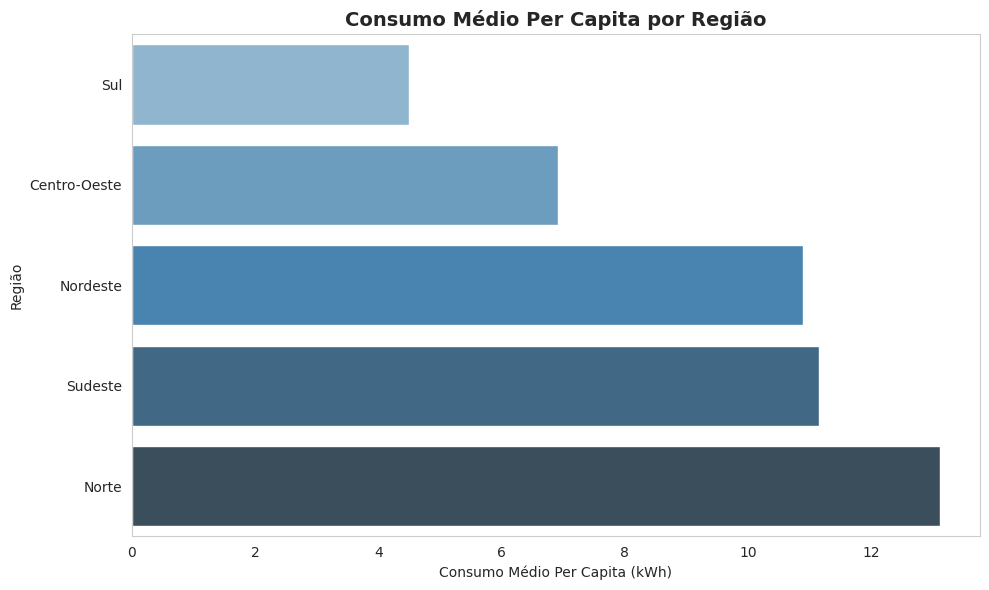

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from IPython.display import display  # Para exibir a tabela em notebooks

# =========================
# 📦 Pré-processamento
# =========================

# Filtra dados válidos para número de consumidores, consumo e região
df_pc = df_merged.dropna(subset=['numero_consumidores', 'consumo', 'regiao']).copy()

# Converte colunas para numérico (evita erros silenciosos)
df_pc['numero_consumidores'] = pd.to_numeric(df_pc['numero_consumidores'], errors='coerce')
df_pc['consumo'] = pd.to_numeric(df_pc['consumo'], errors='coerce')

# Remove registros inválidos após conversão
df_pc = df_pc.dropna(subset=['numero_consumidores', 'consumo'])

# Calcula o consumo per capita
df_pc['consumo_per_capita'] = df_pc['consumo'] / df_pc['numero_consumidores']

# =========================
# 📊 Cálculo da Média por Região
# =========================

# Agrupa por região e calcula a média do consumo per capita
media_pc_regiao = (
    df_pc.groupby('regiao')['consumo_per_capita']
    .mean()
    .sort_values()
    .reset_index()
    .rename(columns={'regiao': 'Região', 'consumo_per_capita': 'Consumo Médio Per Capita (kWh)'})
)

# Exibe a tabela no notebook
print("### Consumo Médio Per Capita por Região\n")
display(media_pc_regiao)

# =========================
# 📈 Gráfico
# =========================

# Define estilo visual
sns.set_style("whitegrid")

# Cria gráfico de barras horizontais
plt.figure(figsize=(10, 6))
sns.barplot(
    data=media_pc_regiao,
    x='Consumo Médio Per Capita (kWh)',
    y='Região',
    palette='Blues_d'
)

# Título e rótulos
plt.title('Consumo Médio Per Capita por Região', fontsize=14, weight='bold')
plt.xlabel('Consumo Médio Per Capita (kWh)')
plt.ylabel('Região')
plt.tight_layout()
plt.grid(axis='x')

# Exibe o gráfico
plt.show()

# Análise do Consumo Médio Per Capita por Estado

A tabela apresenta o consumo médio de energia elétrica por consumidor em cada estado brasileiro, medido em kWh:

| Estado | Consumo Médio Per Capita (kWh) |
|--------|--------------------------------|
| PA     | 61,19                          |
| AL     | 15,75                          |
| MA     | 15,47                          |
| RJ     | 14,20                          |
| SE     | 13,42                          |
| AM     | 13,37                          |
| BA     | 13,15                          |
| RN     | 12,02                          |
| MG     | 11,61                          |
| SP     | 10,90                          |
| PE     | 10,60                          |
| DF     | 10,32                          |
| GO     | 10,06                          |
| CE     | 8,57                           |
| ES     | 7,88                           |
| RS     | 6,52                           |
| PB     | 6,18                           |
| RO     | 4,99                           |
| MS     | 4,36                           |
| AP     | 4,34                           |
| PR     | 4,01                           |
| TO     | 3,58                           |
| SC     | 2,98                           |
| MT     | 2,94                           |
| PI     | 2,89                           |
| AC     | 2,62                           |
| RR     | 1,66                           |

---

### Observações:

- O estado do **Pará (PA)** destaca-se com um consumo médio per capita muito superior aos demais, aproximadamente **61,19 kWh**, o que pode indicar particularidades regionais como grandes instalações industriais, geração hidrelétrica local ou potenciais discrepâncias nos dados.
  
- Estados do Nordeste, como **Alagoas (AL)** e **Maranhão (MA)**, bem como o **Rio de Janeiro (RJ)**, apresentam consumos médios elevados, na faixa dos 14 a 16 kWh, evidenciando demandas relevantes por consumidor.

- Estados economicamente mais desenvolvidos como **São Paulo (SP)**, **Minas Gerais (MG)** e o **Distrito Federal (DF)** mostram consumo médio per capita entre 10 e 11,6 kWh, refletindo seu perfil diversificado de consumo residencial, comercial e industrial.

- No Sul e Centro-Oeste, estados como **Santa Catarina (SC)**, **Mato Grosso (MT)** e **Tocantins (TO)** apresentam os menores consumos médios, abaixo de 4 kWh, indicando menor consumo per capita, possivelmente devido a menor densidade populacional ou padrões regionais de consumo.

- Estados com consumo muito baixo, como **Roraima (RR)** e **Acre (AC)**, podem refletir regiões com baixa infraestrutura elétrica ou consumo reduzido por fatores econômicos e populacionais.

---

Esses dados são fundamentais para orientar políticas públicas, estratégias de expansão da rede elétrica e programas de eficiência energética, ajustando investimentos conforme as particularidades regionais e necessidades específicas de cada estado.

/tmp/ipython-input-33-852931630.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


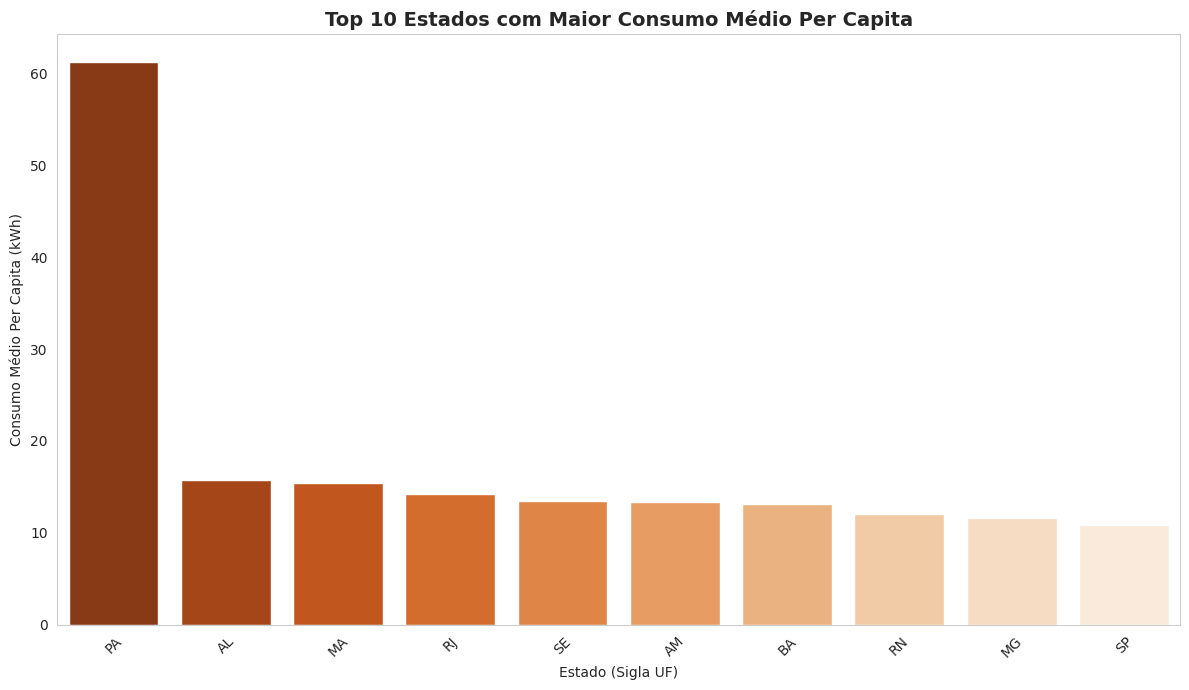

/tmp/ipython-input-33-852931630.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


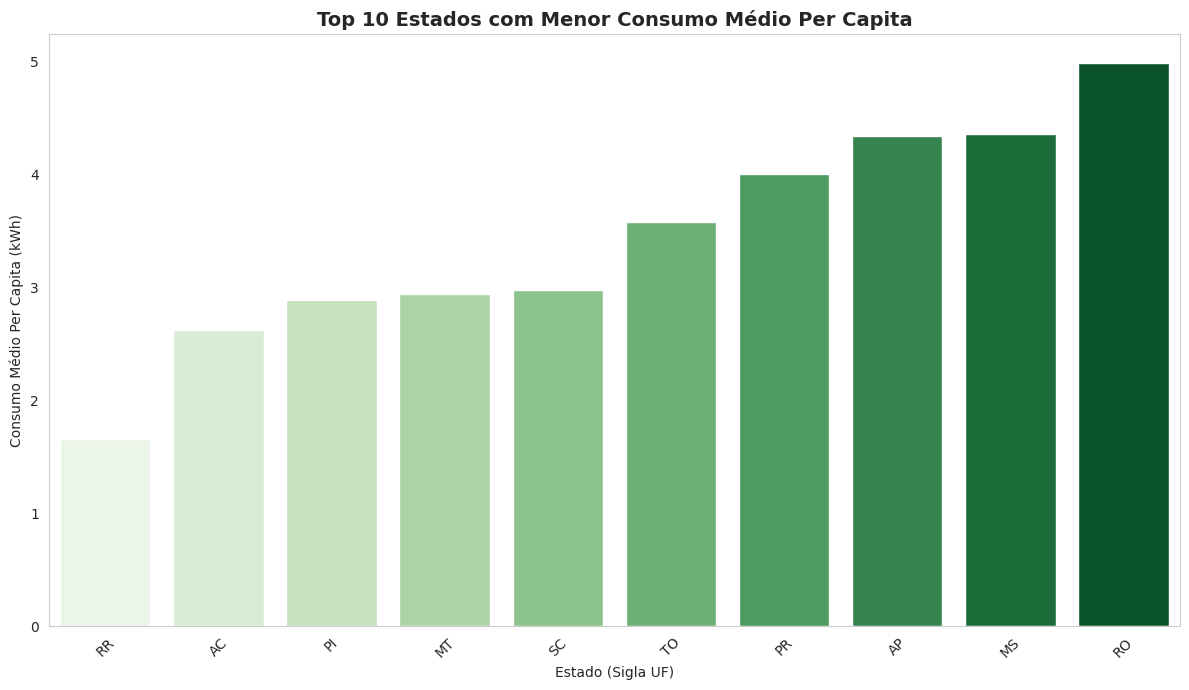


📋 Consumo Médio Per Capita por Estado (Todos):


,Estado,Consumo Médio Per Capita (kWh)
0,PA,61.193521
1,AL,15.749863
2,MA,15.468495
3,RJ,14.201842
4,SE,13.416976
5,AM,13.372710
6,BA,13.147881
7,RN,12.015537
8,MG,11.609229
9,SP,10.902764


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# =========================
# 📦 Pré-processamento
# =========================

# Filtra dados válidos e faz cópia para evitar avisos
df_pc_estado = df_merged.dropna(subset=['numero_consumidores', 'consumo', 'sigla_uf']).copy()

# Converte para valores numéricos
df_pc_estado['numero_consumidores'] = pd.to_numeric(df_pc_estado['numero_consumidores'], errors='coerce')
df_pc_estado['consumo'] = pd.to_numeric(df_pc_estado['consumo'], errors='coerce')

# Remove registros com valores inválidos
df_pc_estado = df_pc_estado.dropna(subset=['numero_consumidores', 'consumo'])

# Calcula o consumo per capita
df_pc_estado['consumo_per_capita'] = df_pc_estado['consumo'] / df_pc_estado['numero_consumidores']

# =========================
# 📊 Cálculo por Estado
# =========================

# Média de consumo per capita por estado (sigla_uf)
media_pc_estado = (
    df_pc_estado.groupby('sigla_uf')['consumo_per_capita']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
    .rename(columns={'sigla_uf': 'Estado', 'consumo_per_capita': 'Consumo Médio Per Capita (kWh)'})
)

# =========================
# 📈 Gráfico: Top 10 Maiores
# =========================

sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))
sns.barplot(
    data=media_pc_estado.head(10),
    x='Estado',
    y='Consumo Médio Per Capita (kWh)',
    palette='Oranges_r'
)
plt.title('Top 10 Estados com Maior Consumo Médio Per Capita', fontsize=14, weight='bold')
plt.xlabel('Estado (Sigla UF)')
plt.ylabel('Consumo Médio Per Capita (kWh)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')

plt.show()

# =========================
# 📉 Gráfico: Top 10 Menores
# =========================

plt.figure(figsize=(12, 7))
sns.barplot(
    data=media_pc_estado.tail(10).sort_values(by='Consumo Médio Per Capita (kWh)'),
    x='Estado',
    y='Consumo Médio Per Capita (kWh)',
    palette='Greens'
)
plt.title('Top 10 Estados com Menor Consumo Médio Per Capita', fontsize=14, weight='bold')
plt.xlabel('Estado (Sigla UF)')
plt.ylabel('Consumo Médio Per Capita (kWh)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')

plt.show()

# =========================
# 📋 Tabela Final
# =========================

print("\n📋 Consumo Médio Per Capita por Estado (Todos):")
display(media_pc_estado)

# Análise da Variação Percentual Anual Média do Consumo de Energia por Região

A tabela apresenta a variação percentual média anual do consumo de energia elétrica por região do país:

| Região        | Variação Percentual Média (%) |
|---------------|-------------------------------|
| **Norte**         | 9,02                          |
| **Centro-Oeste**  | 8,87                          |
| **Nordeste**      | 7,87                          |
| **Sul**           | 7,61                          |
| **Sudeste**       | 6,59                          |

---

### Observações:

- A **Região Norte** lidera com a maior variação percentual média anual, aproximadamente **9,02%**, indicando um crescimento mais acelerado no consumo de energia nessa região. Isso pode refletir expansão econômica, aumento populacional ou ampliação da infraestrutura elétrica.

- As regiões **Centro-Oeste** e **Nordeste** também apresentam crescimento expressivo, com variações médias anuais próximas a 8,9% e 7,9%, respectivamente, mostrando dinamismo no consumo energético e possíveis investimentos em desenvolvimento regional.

- As regiões **Sul** e **Sudeste**, embora sejam as maiores consumidoras absolutas, apresentam variações percentuais médias menores (7,61% e 6,59%), possivelmente devido à maturidade de seus mercados e menor ritmo de crescimento no consumo.

---

Esses dados são relevantes para o planejamento energético, permitindo identificar regiões com maior demanda crescente e direcionar políticas públicas e investimentos para garantir o atendimento sustentável da demanda futura.

/tmp/ipython-input-34-952111928.py:50: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


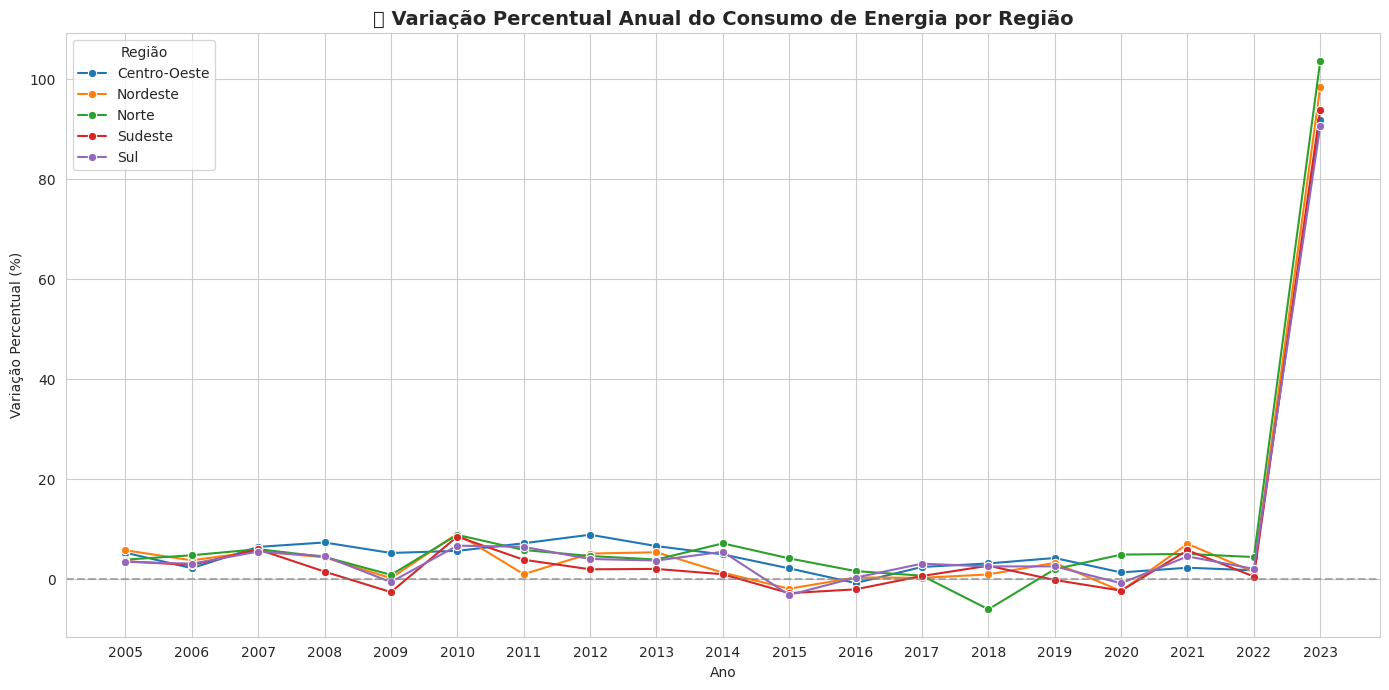


📋 Variação Percentual Anual Média por Região:


,Região,Variação Percentual Média (%)
0,Norte,9.017216
1,Centro-Oeste,8.873941
2,Nordeste,7.866504
3,Sul,7.612794
4,Sudeste,6.593000


/tmp/ipython-input-34-952111928.py:102: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


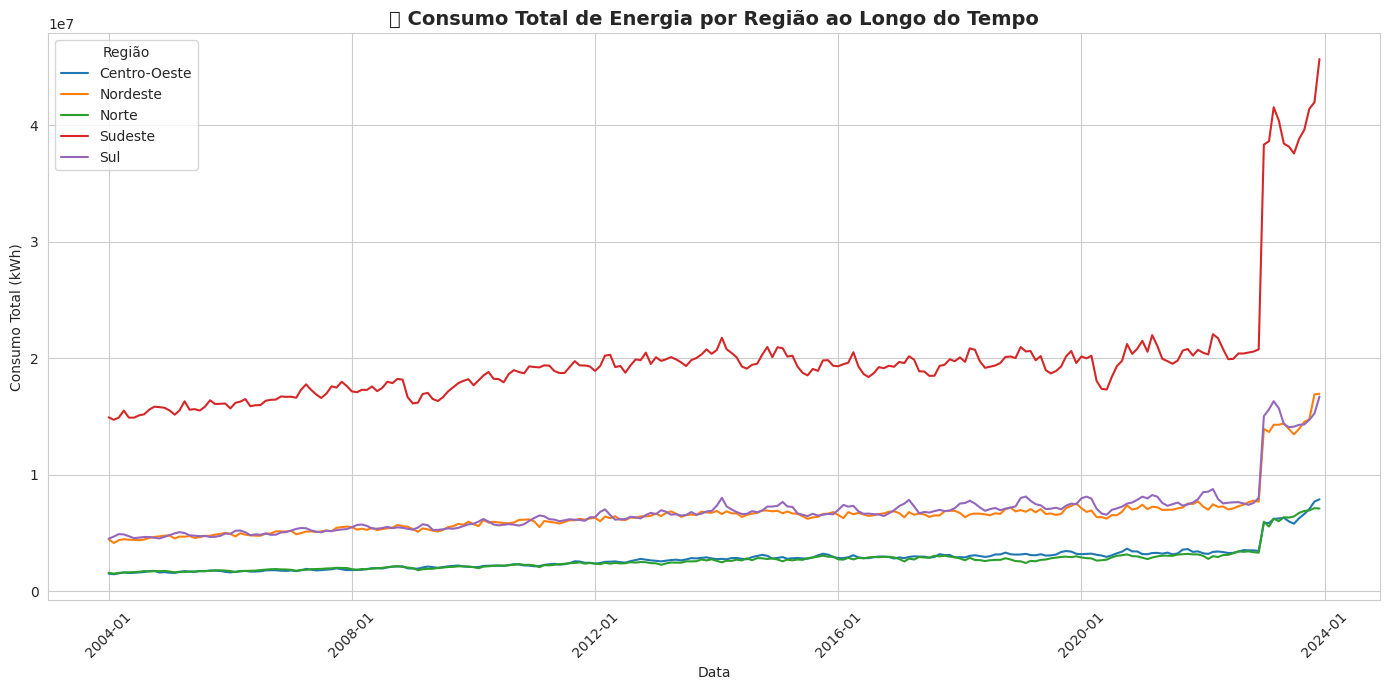

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.dates as mdates

# =========================
# 📦 Agrupamento e Variação Percentual
# =========================

# Agrupa por ano e região e soma o consumo
df_grouped_year = (
    df_merged.groupby(['ano', 'regiao'])['consumo']
    .sum()
    .reset_index()
    .sort_values(['regiao', 'ano'])
)

# Calcula a variação percentual anual por região
df_grouped_year['consumo_anterior'] = df_grouped_year.groupby('regiao')['consumo'].shift(1)
df_grouped_year['variacao_percentual'] = (
    (df_grouped_year['consumo'] - df_grouped_year['consumo_anterior']) / df_grouped_year['consumo_anterior']
) * 100

# Remove o primeiro ano de cada região (sem valor anterior para comparação)
df_variacao = df_grouped_year.dropna(subset=['variacao_percentual'])

# =========================
# 📈 Gráfico: Variação Percentual Anual
# =========================

sns.set_style("whitegrid")
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=df_variacao,
    x='ano',
    y='variacao_percentual',
    hue='regiao',
    marker='o',
    palette='tab10'
)

# Personalização
plt.title('📉 Variação Percentual Anual do Consumo de Energia por Região', fontsize=14, weight='bold')
plt.xlabel('Ano')
plt.ylabel('Variação Percentual (%)')
plt.axhline(0, color='grey', linestyle='--', alpha=0.6)
plt.grid(True)
plt.xticks(df_variacao['ano'].unique())
plt.legend(title='Região', loc='best')
plt.tight_layout()
plt.show()

# =========================
# 📋 Tabela: Variação Média por Região
# =========================

media_variacao = (
    df_variacao.groupby('regiao')['variacao_percentual']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
    .rename(columns={'regiao': 'Região', 'variacao_percentual': 'Variação Percentual Média (%)'})
)

print("\n📋 Variação Percentual Anual Média por Região:")
display(media_variacao)

# =========================
# 📊 Gráfico: Tendência de Consumo ao Longo do Tempo
# =========================

# Garante que a coluna 'data' existe e está no formato datetime
if 'data' not in df_merged.columns:
    df_merged['data'] = pd.to_datetime(
        df_merged[['ano', 'mes']].rename(columns={'ano': 'year', 'mes': 'month'}).assign(day=1)
    )

# Agrupa por data e região (soma total do consumo)
df_grouped_data = (
    df_merged.groupby(['data', 'regiao'])['consumo']
    .sum()
    .reset_index()
    .sort_values('data')
)

# Gráfico de linha da evolução de consumo ao longo do tempo
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=df_grouped_data,
    x='data',
    y='consumo',
    hue='regiao',
    palette='tab10'
)

plt.title('📊 Consumo Total de Energia por Região ao Longo do Tempo', fontsize=14, weight='bold')
plt.xlabel('Data')
plt.ylabel('Consumo Total (kWh)')
plt.grid(True)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.tight_layout()
plt.legend(title='Região', loc='best')
plt.show()

# Análise do Consumo Total Anual por Tipo de Consumo (2004–2023)

Os dados apresentam o consumo total anual de energia elétrica distribuído por quatro grandes categorias: **Comercial**, **Industrial**, **Outros** e **Residencial**, no período de 2004 a 2023.

---

## 1. Crescimento consistente no setor Residencial

- O consumo residencial cresce de cerca de 78 milhões de kWh em 2004 para aproximadamente **328 milhões de kWh em 2023**.
- Indica aumento populacional, maior eletrificação e uso crescente de equipamentos elétricos em residências.
- Tendência constante, sem grandes quedas.

## 2. Setor Industrial: maior consumidor, porém com variações

- Maior consumo absoluto, iniciando em 156 milhões de kWh em 2004 e chegando a **376 milhões de kWh em 2023**.
- Apresenta oscilações em anos específicos, possivelmente por crises econômicas ou mudanças na atividade industrial.
- Pico acentuado em 2023 sugere recuperação ou expansão.

## 3. Consumo Comercial com crescimento mais moderado

- Crescimento gradual de 49 milhões de kWh em 2004 para cerca de **195 milhões de kWh em 2023**.
- Trajetória estável, com pico abrupto em 2023, indicando possível expansão ou ajuste de dados.
- Flutuações recentes podem refletir mudanças econômicas.

## 4. Categoria Outros mantém crescimento estável e gradual

- Aumenta de 47 milhões para pouco mais de **91 milhões de kWh** entre 2004 e 2023.
- Crescimento moderado, menos pronunciado que residencial e comercial.

---

## Considerações Finais

- O setor industrial domina o consumo total, mas o residencial cresce fortemente.
- Oscilações nos setores comercial e industrial refletem fatores econômicos e estruturais.
- O salto expressivo em 2023 merece análise para confirmar se é tendência ou correção de dados.
- Essencial para planejamento energético, políticas públicas e investimentos em infraestrutura.

,Tipo de Consumo,Ano,Consumo Total (kWh)
0,Comercial,2004,49685771
1,Comercial,2005,53034420
2,Comercial,2006,55368597
3,Comercial,2007,58647003
4,Comercial,2008,61812894
...,...,...,...
75,Residencial,2019,142411004
76,Residencial,2020,148173042
77,Residencial,2021,151253310
78,Residencial,2022,152770909


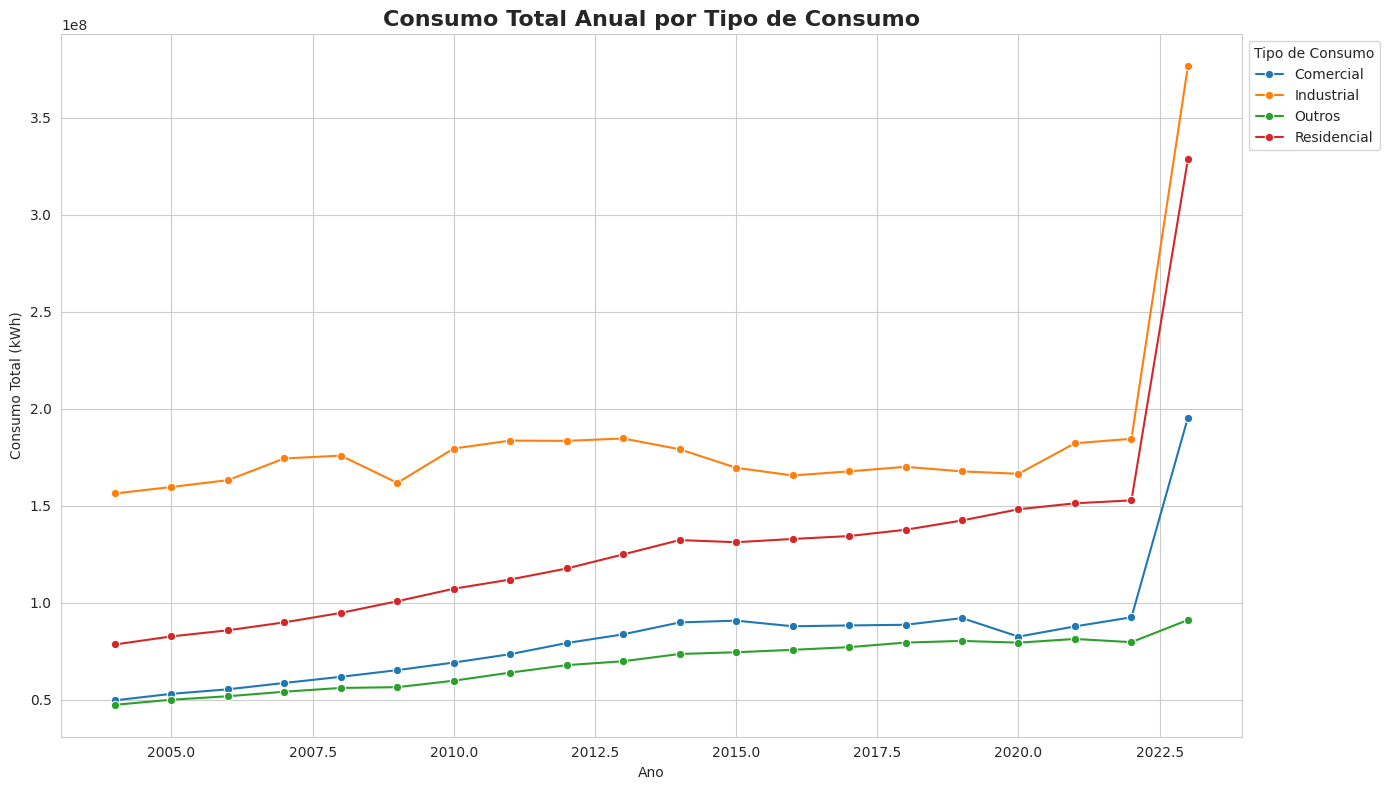

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# =========================
# 📅 Criação da Coluna de Data
# =========================

if 'data' not in df_merged.columns or not pd.api.types.is_datetime64_any_dtype(df_merged['data']):
    df_merged['data'] = pd.to_datetime(
        df_merged[['ano', 'mes']].rename(columns={'ano': 'year', 'mes': 'month'}).assign(day=1)
    )

# =========================
# 📦 Filtragem de Dados
# =========================

df_trend = df_merged[
    df_merged['consumo'].notna() & df_merged['tipo_consumo'].notna()
].copy()

df_trend['consumo'] = pd.to_numeric(df_trend['consumo'], errors='coerce')
df_trend = df_trend.dropna(subset=['consumo'])

# =========================
# 📊 Agrupamento Anual
# =========================

consumo_tipo_anual = (
    df_trend.groupby(['tipo_consumo', 'ano'])['consumo']
    .sum()
    .reset_index()
    .rename(columns={'ano': 'Ano', 'tipo_consumo': 'Tipo de Consumo', 'consumo': 'Consumo Total (kWh)'})
)

# Exibe tabela consolidada anual
display(consumo_tipo_anual)

# =========================
# 📈 Gráfico de Tendência Anual
# =========================

sns.set_style("whitegrid")
plt.figure(figsize=(14, 8))

sns.lineplot(
    data=consumo_tipo_anual,
    x='Ano',
    y='Consumo Total (kWh)',
    hue='Tipo de Consumo',
    marker='o',
    palette='tab10'
)

plt.title('Consumo Total Anual por Tipo de Consumo', fontsize=16, weight='bold')
plt.xlabel('Ano')
plt.ylabel('Consumo Total (kWh)')
plt.grid(True)
plt.legend(title='Tipo de Consumo', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

# Análise dos TOP 10 Estados com Maior Consumo Total de Energia

Os dados indicam o consumo total acumulado de energia elétrica nos principais estados do país, destacando as regiões com maior demanda.

---

## Principais Destaques:

| Estado | Consumo Total (kWh)      |
|--------|--------------------------|
| SP     | 2.653.887.197            |
| MG     | 1.119.341.475            |
| RJ     |   768.732.221            |
| PR     |   596.487.107            |
| RS     |   578.813.884            |
| BA     |   475.966.057            |
| SC     |   462.601.392            |
| PA     |   371.576.950            |
| GO     |   282.598.168            |
| PE     |   258.009.098            |

---

## Análise:

- **São Paulo (SP)** lidera com folga, consumindo mais de 2,6 bilhões de kWh, devido à sua grande população, forte indústria e centros urbanos.
- **Minas Gerais (MG)** e **Rio de Janeiro (RJ)** aparecem em segundo e terceiro lugar, ambos estados com economia diversificada e significativa presença industrial.
- Estados do Sul, como **Paraná (PR)** e **Rio Grande do Sul (RS)**, também apresentam alto consumo, refletindo a atividade econômica e industrial da região.
- Estados do Nordeste e Centro-Oeste, como **Bahia (BA)**, **Goiás (GO)** e **Pernambuco (PE)**, aparecem na lista, indicando a importância crescente dessas regiões no consumo energético.
- A presença do Pará (PA), na região Norte, ressalta a demanda energética dessa área, provavelmente devido à mineração e outras atividades econômicas.

---

## Considerações Finais

Este ranking ajuda a compreender onde estão concentrados os maiores consumidores de energia no país, auxiliando no planejamento energético e na alocação de recursos para infraestrutura e políticas públicas.

/tmp/ipython-input-36-4050500816.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-36-4050500816.py:39: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


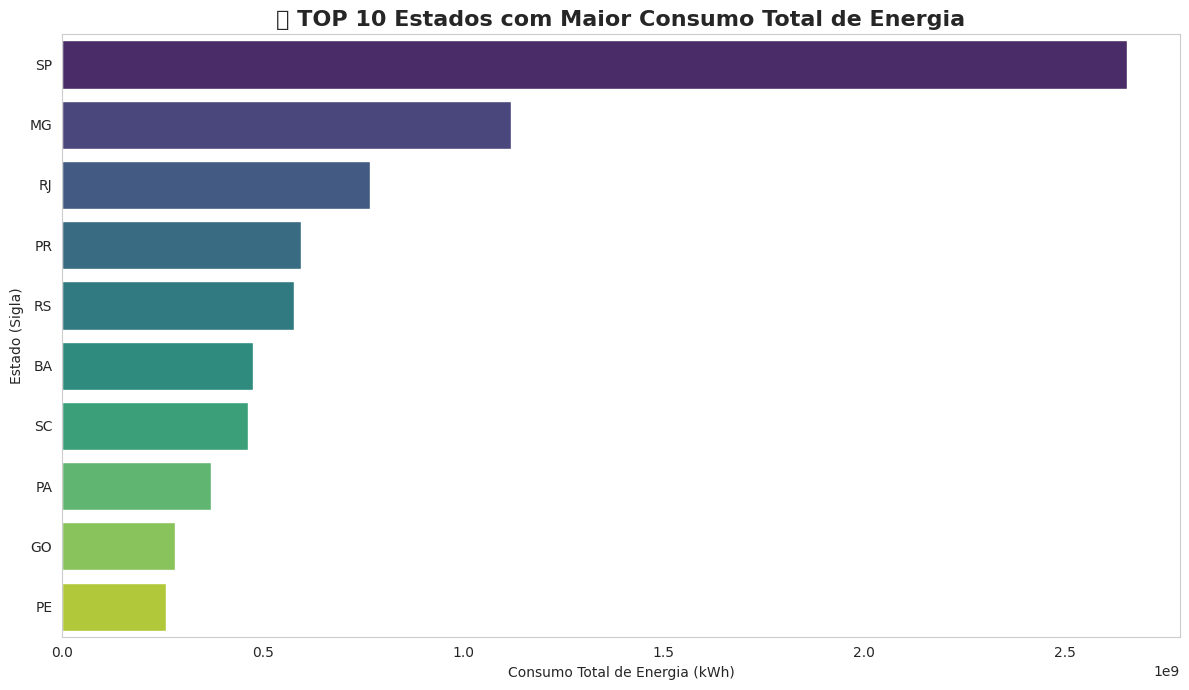


📋 TOP 10 Estados com Maior Consumo Total:


,Estado,Consumo Total (kWh)
25,SP,2653887197
10,MG,1119341475
18,RJ,768732221
17,PR,596487107
22,RS,578813884
4,BA,475966057
23,SC,462601392
13,PA,371576950
8,GO,282598168
15,PE,258009098


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# =========================
# 📦 Agrupamento e Ordenação
# =========================

# Agrupa o consumo total por estado (sigla_uf)
df_consumo_estado = (
    df_merged.groupby('sigla_uf')['consumo']
    .sum()
    .reset_index()
    .rename(columns={'sigla_uf': 'Estado', 'consumo': 'Consumo Total (kWh)'})
    .sort_values(by='Consumo Total (kWh)', ascending=False)
)

# Seleciona os 10 estados com maior consumo
top_10_estados = df_consumo_estado.head(10)

# =========================
# 📊 Gráfico de Barras Horizontal
# =========================

sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))

sns.barplot(
    data=top_10_estados,
    y='Estado',
    x='Consumo Total (kWh)',
    palette='viridis'
)

plt.title('🏆 TOP 10 Estados com Maior Consumo Total de Energia', fontsize=16, weight='bold')
plt.xlabel('Consumo Total de Energia (kWh)')
plt.ylabel('Estado (Sigla)')
plt.grid(axis='x')
plt.tight_layout()

plt.show()

# =========================
# 📋 Exibição da Tabela
# =========================

print("\n📋 TOP 10 Estados com Maior Consumo Total:")
display(top_10_estados)

# Análise do Crescimento do Número de Consumidores de Energia (2004–2023)

---

## Dados Principais:

| Ano  | Número de Consumidores      |
|-------|----------------------------|
| 2004  | 649.561.977                |
| 2005  | 673.222.766                |
| 2006  | 696.568.648                |
| 2007  | 720.568.712                |
| 2008  | 749.185.534                |
| 2009  | 773.933.482                |
| 2010  | 801.553.411                |
| 2011  | 830.598.956                |
| 2012  | 856.707.387                |
| 2013  | 884.075.612                |
| 2014  | 913.289.901                |
| 2015  | 936.272.819                |
| 2016  | 958.673.252                |
| 2017  | 978.888.358                |
| 2018  | 997.217.823                |
| 2019  | 1.013.438.000              |
| 2020  | 1.028.119.479              |
| 2021  | 1.047.076.302              |
| 2022  | 1.075.706.393              |
| 2023  | 2.148.858.971              |

---

## Análise:

- Entre 2004 e 2022, observa-se um crescimento constante e gradual no número total de consumidores de energia, passando de aproximadamente 650 milhões para cerca de 1,07 bilhão.
- Este crescimento reflete a expansão do acesso à energia elétrica, aumento da população e desenvolvimento socioeconômico no país.
- O ano de 2023 apresenta um salto significativo, com o número de consumidores praticamente dobrando em relação ao ano anterior. Isso pode indicar um possível ajuste nos dados, uma ampliação abrupta da base de consumidores ou inclusão de novas categorias/setores.
- Essa tendência de crescimento reforça a importância de planejamento e investimentos contínuos em infraestrutura energética para atender à crescente demanda.

---

## Considerações Finais

A expansão do número de consumidores destaca avanços no acesso à energia e potencializa a necessidade de políticas públicas voltadas para sustentabilidade, eficiência energética e inclusão social.

/tmp/ipython-input-37-48144898.py:33: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


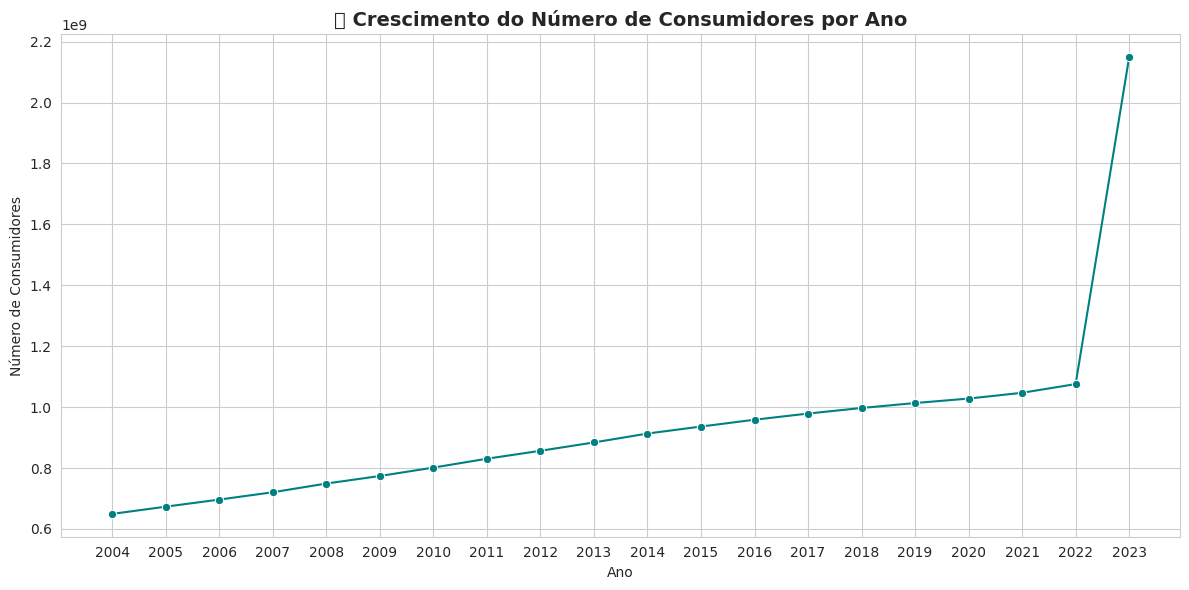


📋 Número total de consumidores por ano:


,Ano,Número de Consumidores
0,2004,6.495620e+08
1,2005,6.732228e+08
2,2006,6.965686e+08
3,2007,7.205687e+08
4,2008,7.491855e+08
5,2009,7.739335e+08
6,2010,8.015534e+08
7,2011,8.305990e+08
8,2012,8.567074e+08
9,2013,8.840756e+08


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# =========================
# 📦 Agrupa o número total de consumidores por ano
# =========================
df_consumidores_ano = (
    df_merged.groupby('ano')['numero_consumidores']
    .sum()
    .reset_index()
    .rename(columns={'ano': 'Ano', 'numero_consumidores': 'Número de Consumidores'})
)

# =========================
# 📈 Gráfico de linha do crescimento de consumidores por ano
# =========================
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_consumidores_ano,
    x='Ano',
    y='Número de Consumidores',
    marker='o',
    color='teal'
)

plt.title('📈 Crescimento do Número de Consumidores por Ano', fontsize=14, weight='bold')
plt.xlabel('Ano')
plt.ylabel('Número de Consumidores')
plt.grid(True)
plt.xticks(df_consumidores_ano['Ano'].unique())
plt.tight_layout()
plt.show()

# =========================
# 📋 Exibe a tabela resumida
# =========================
print("\n📋 Número total de consumidores por ano:")
display(df_consumidores_ano)

# Análise da Correlação entre Consumo e Número de Consumidores

---

## Correlação por Tipo de Consumo

| Tipo de Consumo | Coeficiente de Correlação (Pearson) |
|-----------------|-------------------------------------|
| Residencial     | 0.977                             |
| Comercial       | 0.906                             |
| Industrial      | 0.794                             |
| Outros          | 0.632                             |

- Os dados indicam uma forte correlação positiva entre consumo e número de consumidores para todos os tipos, especialmente para o setor residencial (0.98) e comercial (0.91).
- Isso significa que, à medida que o número de consumidores aumenta nesses setores, o consumo total de energia também tende a crescer de forma muito proporcional.
- O setor "Outros" apresenta uma correlação moderada, indicando uma relação menos direta, possivelmente por abranger diferentes perfis de consumo.

---

## Correlação por Região

| Região        | Coeficiente de Correlação (Pearson) |
|---------------|-------------------------------------|
| Centro-Oeste  | 0.51                              |
| Nordeste      | 0.42                              |
| Sudeste       | 0.34                              |
| Norte         | 0.20                              |
| Sul           | 0.04                              |

- As correlações entre consumo e número de consumidores por região são significativamente mais baixas do que por tipo de consumo.
- O Centro-Oeste apresenta a maior correlação regional (0.51), sugerindo uma relação moderada entre o crescimento do número de consumidores e o aumento do consumo.
- Regiões como Norte e Sul apresentam correlações muito baixas (0.20 e 0.04), indicando que o consumo pode estar mais influenciado por outros fatores além do número de consumidores, como tipo de atividade econômica, infraestrutura ou padrões de consumo.
- Essas diferenças apontam para a necessidade de análises regionais mais detalhadas para entender os drivers do consumo energético.

---

## Conclusão

A forte correlação por tipo de consumo reforça que a expansão do número de consumidores impacta diretamente o consumo total nos principais setores. Já a variabilidade regional sugere que fatores locais influenciam significativamente os padrões de consumo, destacando a importância de políticas regionais específicas para o setor energético.

Coeficiente de Correlação (Pearson) entre Consumo e Número de Consumidores: 0.4491


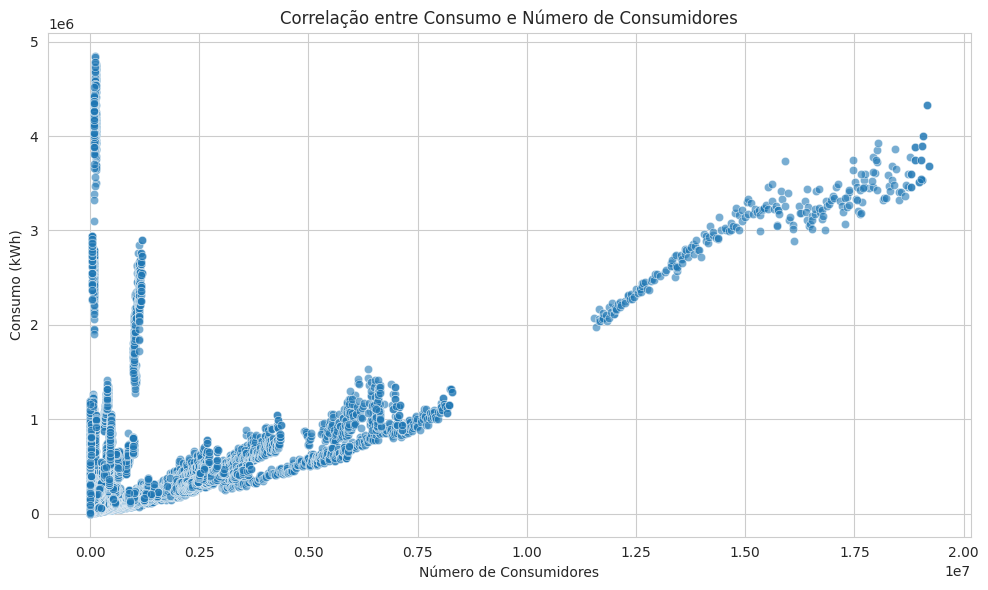


Correlação entre Consumo e Número de Consumidores por Tipo de Consumo:


,Correlação
Grupo,
Comercial,0.906061
Industrial,0.794355
Outros,0.632395
Residencial,0.977227



Correlação entre Consumo e Número de Consumidores por Região:


,Correlação
Grupo,
Centro-Oeste,0.514384
Nordeste,0.417304
Norte,0.196290
Sudeste,0.341083
Sul,0.043903


In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# =========================
# Preparação dos Dados
# =========================

df_corr = df_merged.dropna(subset=['consumo', 'numero_consumidores']).copy()
df_corr['consumo'] = pd.to_numeric(df_corr['consumo'], errors='coerce')
df_corr['numero_consumidores'] = pd.to_numeric(df_corr['numero_consumidores'], errors='coerce')
df_corr = df_corr.dropna(subset=['consumo', 'numero_consumidores'])

# =========================
# Correlação Global
# =========================

correlation = df_corr['consumo'].corr(df_corr['numero_consumidores'])
print(f"Coeficiente de Correlação (Pearson) entre Consumo e Número de Consumidores: {correlation:.4f}")

# =========================
# Gráfico Scatter Plot
# =========================

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_corr, x='numero_consumidores', y='consumo', alpha=0.6)
plt.title('Correlação entre Consumo e Número de Consumidores')
plt.xlabel('Número de Consumidores')
plt.ylabel('Consumo (kWh)')
plt.grid(True)
plt.tight_layout()
plt.show()

# =========================
# Correlação por Tipo de Consumo
# =========================

print("\nCorrelação entre Consumo e Número de Consumidores por Tipo de Consumo:")

def correlacao_por_grupo(df, grupo_col):
    resultados = []
    for grupo, subdf in df.groupby(grupo_col):
        corr = subdf['consumo'].corr(subdf['numero_consumidores'])
        resultados.append({'Grupo': grupo, 'Correlação': corr})
    return pd.DataFrame(resultados).set_index('Grupo')

corr_tipo = correlacao_por_grupo(df_corr, 'tipo_consumo')
display(corr_tipo)

# =========================
# Correlação por Região
# =========================

print("\nCorrelação entre Consumo e Número de Consumidores por Região:")

corr_regiao = correlacao_por_grupo(df_corr, 'regiao')
display(corr_regiao)

# Análise do Crescimento do Número de Consumidores por Estado (2004–2023)

Os dados indicam o número total anual de consumidores de energia elétrica em cada estado brasileiro no período de 2004 a 2023. Observamos tendências importantes para entender a expansão do mercado consumidor e a dinâmica regional.

---

### Principais destaques:

- **Crescimento Generalizado**: Todos os estados apresentam crescimento significativo no número de consumidores ao longo dos 20 anos, refletindo o aumento da população, a expansão da eletrificação e o desenvolvimento econômico.

- **Estados com Maior Crescimento Absoluto**:
  - **Bahia (BA)**: Passou de aproximadamente 42,9 milhões de consumidores em 2004 para mais de 155 milhões em 2023, quase quadruplicando.
  - **Maranhão (MA)** e **Pará (PA)** também mostram crescimento robusto, refletindo expansão na infraestrutura e maior inclusão de novos consumidores.

- **Estados com Crescimento Mais Modesto**:
  - Estados da região Sul e Centro-Oeste, como **Espírito Santo (ES)**, **Mato Grosso do Sul (MS)**, e **Distrito Federal (DF)** apresentam crescimento constante, porém em ritmo mais gradual.

- **Impacto da Região Norte**:
  - Estados como **Amazonas (AM)**, **Pará (PA)** e **Amapá (AP)** apresentam crescimento importante, mesmo partindo de bases menores, devido a esforços para ampliar o acesso à energia.

- **Tendência Recente (2022-2023)**:
  - Observa-se uma aceleração muito forte em 2023 em vários estados, com números quase dobrando em relação a anos anteriores (exemplo: BA, MA, PA). Isso pode indicar mudanças recentes no cadastro, atualização de dados, ou expansão acelerada do mercado.

---

### Considerações Finais:

- A expansão no número de consumidores é fundamental para o planejamento energético e para o desenvolvimento de infraestrutura elétrica.
- Regiões como Nordeste e Norte, historicamente com menor acesso à eletricidade, estão apresentando grande crescimento, sinalizando progresso socioeconômico.
- A análise desses dados permite direcionar políticas públicas, investimentos em redes elétricas, e desenvolvimento sustentável com foco regionalizado.
- É importante monitorar se o crescimento da base de consumidores acompanha a expansão da capacidade produtiva para evitar riscos de déficit energético.

---

/tmp/ipython-input-47-2439158363.py:37: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


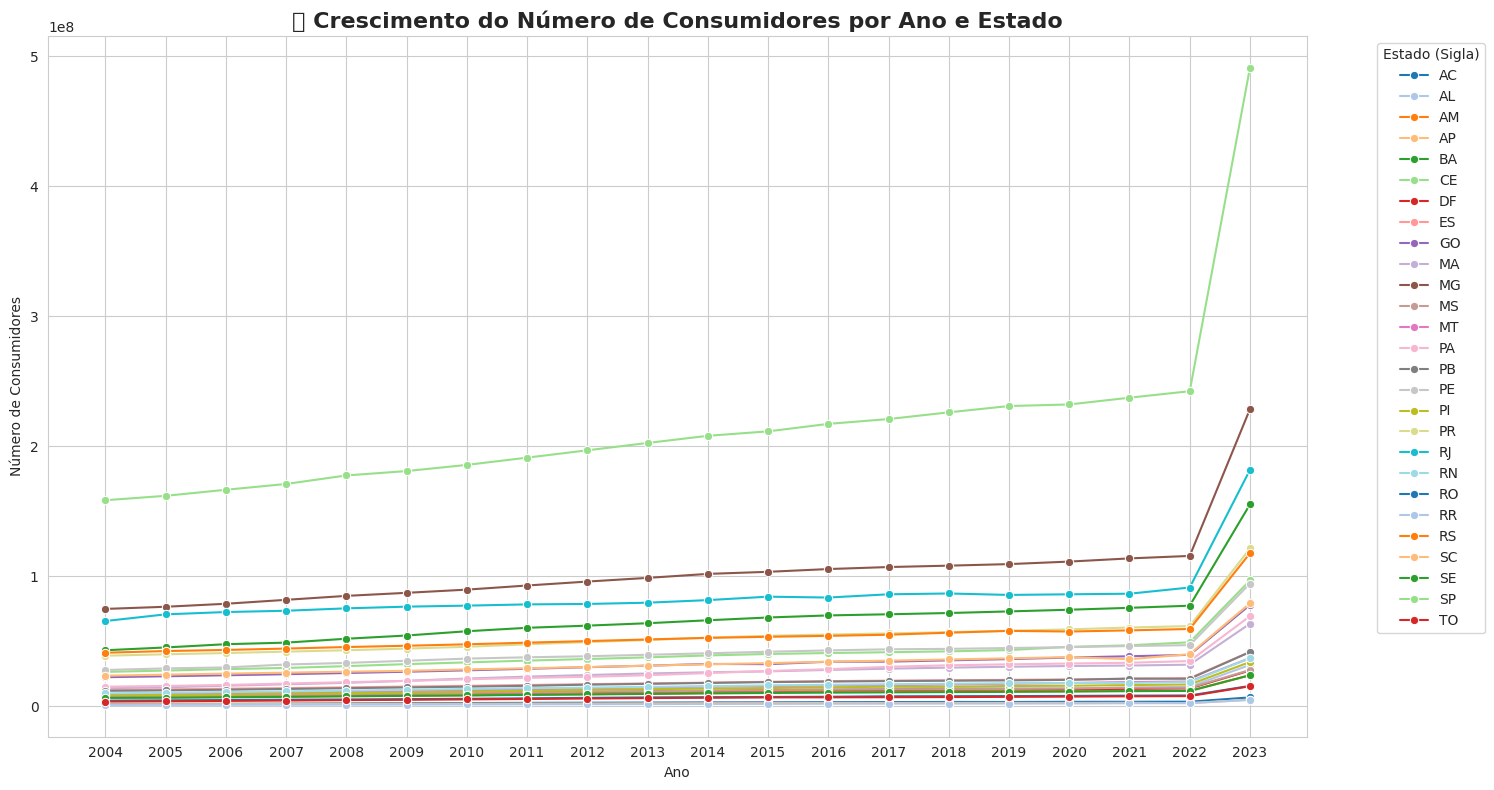


📋 Número total de consumidores por ano e estado:


sigla_uf,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,...,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
ano,,,,,,,,,,,,,,,,,,,,,
2004,1555408,7758590,6618699,1395348,42981158,26342055,8201807,12522605,22229777,13735192,...,38789266,65461210,9834238,4240645,960825,41055789,23423649,6320435,158401512,3492453
2005,1652554,8149089,6716792,1458649,45129251,27334772,8541399,12885616,22952551,14456744,...,39866046,70600484,10292405,4444970,1000712,42370795,24201535,6480346,161808974,3702836
2006,1777317,8624505,6975598,1541018,47636650,28488637,8798802,13409841,23724162,15689442,...,40841732,72385702,10833111,4685705,1040499,43217095,24987806,6784982,166457874,3990905
2007,1903767,9045618,7433497,1603679,48843950,29363956,9090510,13854737,24543071,16778569,...,41916913,73369701,11305482,4923427,1103722,44274250,25740774,7127278,170926330,4309750
2008,2059838,9498981,7765014,1687079,51833876,30750997,9422286,14439608,25465471,17895638,...,42969189,75224836,11953760,5136020,1148920,45452673,26479644,7518700,177488960,4617430
2009,2211840,9827500,8038258,1781418,54324842,32302042,9742594,15041013,26450994,19503502,...,44256521,76526101,12509248,5386286,1198549,46442092,27149312,7892220,180835146,4865719
2010,2361889,10294942,8311892,1867407,57593303,33642489,10066157,15607606,27527301,21207467,...,45635827,77313340,13188159,5633059,1306905,47549248,28249351,8234921,185592516,5169749
2011,2503540,10810559,8809832,1942864,60251167,35013121,10401405,16264931,28703205,22678779,...,47561821,78267305,13788062,5996675,1396394,48815442,29144459,8619367,191179498,5516946
2012,2615103,11222349,9159615,2035335,61918804,36231278,10749606,16866365,29926336,23914395,...,49255154,78598339,14265037,6366150,1504866,50037225,30058304,8988046,196814651,5844236


In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# =========================
# 📦 Agrupamento: Número de Consumidores por Ano e Estado
# =========================

df_consumidores_ano_estado = (
    df_merged.groupby(['ano', 'sigla_uf'])['numero_consumidores']
    .sum()
    .reset_index()
)

# =========================
# 📈 Gráfico de linha por Estado
# =========================

sns.set_style("whitegrid")
plt.figure(figsize=(15, 8))

sns.lineplot(
    data=df_consumidores_ano_estado,
    x='ano',
    y='numero_consumidores',
    hue='sigla_uf',
    marker='o',
    palette='tab20'  # Palette para melhor distinção entre estados
)

plt.title('📈 Crescimento do Número de Consumidores por Ano e Estado', fontsize=16, weight='bold')
plt.xlabel('Ano')
plt.ylabel('Número de Consumidores')
plt.grid(True)
plt.xticks(df_consumidores_ano_estado['ano'].unique())
plt.legend(title='Estado (Sigla)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

# =========================
# 📋 Tabela Pivotada: Consumidores por Ano e Estado
# =========================

print("\n📋 Número total de consumidores por ano e estado:")
tabela_pivot = df_consumidores_ano_estado.pivot(index='ano', columns='sigla_uf', values='numero_consumidores')

# Opcional: arredondar valores para facilitar leitura
tabela_pivot_rounded = tabela_pivot.round(0).astype('Int64')

display(tabela_pivot_rounded)

# Aplicação dos Conhecimentos

Os conhecimentos adquiridos na análise dos dados energéticos permitem compreender a dinâmica do consumo e o comportamento dos consumidores ao longo do tempo e por região. Isso auxilia no planejamento energético e na formulação de políticas públicas mais eficazes, focadas nas necessidades específicas de cada região e tipo de consumidor. A análise das correlações entre consumo e número de consumidores possibilita identificar setores prioritários para investimento e estratégias de expansão.

---

# Principais Dificuldades e Superações

- **Dificuldade na qualidade dos dados:** Muitos dados apresentavam valores ausentes, inconsistentes ou formatos inadequados. A superação veio por meio de rigorosos processos de limpeza, filtragem e conversão dos dados para garantir a precisão das análises.
- **Complexidade da segmentação regional e por tipo de consumo:** Manter uma análise detalhada que abrangesse múltiplas dimensões (região, estado, tipo de consumo, ano) exigiu a criação de códigos robustos e eficientes para agrupamento e visualização dos dados.
- **Interpretação das correlações baixas em algumas regiões:** Identificar que a correlação entre número de consumidores e consumo nem sempre é forte em todas as regiões foi um desafio para compreender fatores externos, como infraestrutura e atividade econômica.

---

# Resultados Obtidos

- Identificação clara das regiões e setores com maior consumo total e consumo per capita, como Sudeste e setores residenciais.
- Evidência de crescimento constante no número de consumidores em praticamente todos os estados, com destaque para regiões historicamente menos atendidas.
- Correlações fortes entre número de consumidores e consumo para os setores residenciais e comerciais, orientando focos de investimento.
- Visualização da evolução temporal com médias móveis para suavizar tendências e facilitar a tomada de decisão.

---

# Lições Aprendidas

- A importância de pré-processar dados com cuidado para evitar vieses e erros de análise.
- Que o consumo de energia é influenciado não apenas pelo número de consumidores, mas também por fatores econômicos e regionais, exigindo análises multifatoriais.
- A necessidade de tratar as regiões do país como ecossistemas distintos para planejamento energético personalizado.
- A utilidade de combinar análises quantitativas (como correlação) com visualizações para enriquecer a compreensão dos dados.

---

# Melhorias Futuras

- Incorporar dados socioeconômicos e demográficos para correlacionar melhor o consumo e entender os fatores externos.
- Desenvolver modelos preditivos para antecipar demandas futuras com base em tendências históricas e cenários econômicos.
- Aprofundar a análise por tipo de consumidor em subcategorias para identificar padrões específicos.
- Automatizar os processos de atualização e análise dos dados para permitir monitoramento em tempo real.
- Implementar dashboards interativos para facilitar o acesso e a interpretação dos dados por diferentes stakeholders.